In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data_science_job.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [3]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [4]:
df.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.025003
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
training_hours            0.039983
target                    0.000000
dtype: float64

In [5]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'training_hours', 'target'],
      dtype='object')

In [6]:
wajid=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
wajid

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
df[wajid].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
14069,0.920,Full time course,High School,8.0,48.0
18353,0.624,no_enrollment,Graduate,12.0,10.0
4248,0.920,no_enrollment,Graduate,8.0,89.0
18378,0.698,no_enrollment,Graduate,20.0,2.0
7697,0.910,no_enrollment,Graduate,1.0,100.0


In [8]:
df[wajid].shape

(19158, 5)

In [9]:
df[wajid].dropna()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [10]:
len(df[wajid].dropna())

17182

In [11]:
len(df)

19158

In [12]:
len(df[wajid].dropna())/len(df)

0.8968577095730244

In [13]:
(len(df[wajid].dropna())/len(df))*100

89.68577095730244

In [14]:
new_df=df[wajid].dropna()
new_df.shape , df.shape

((17182, 5), (19158, 13))

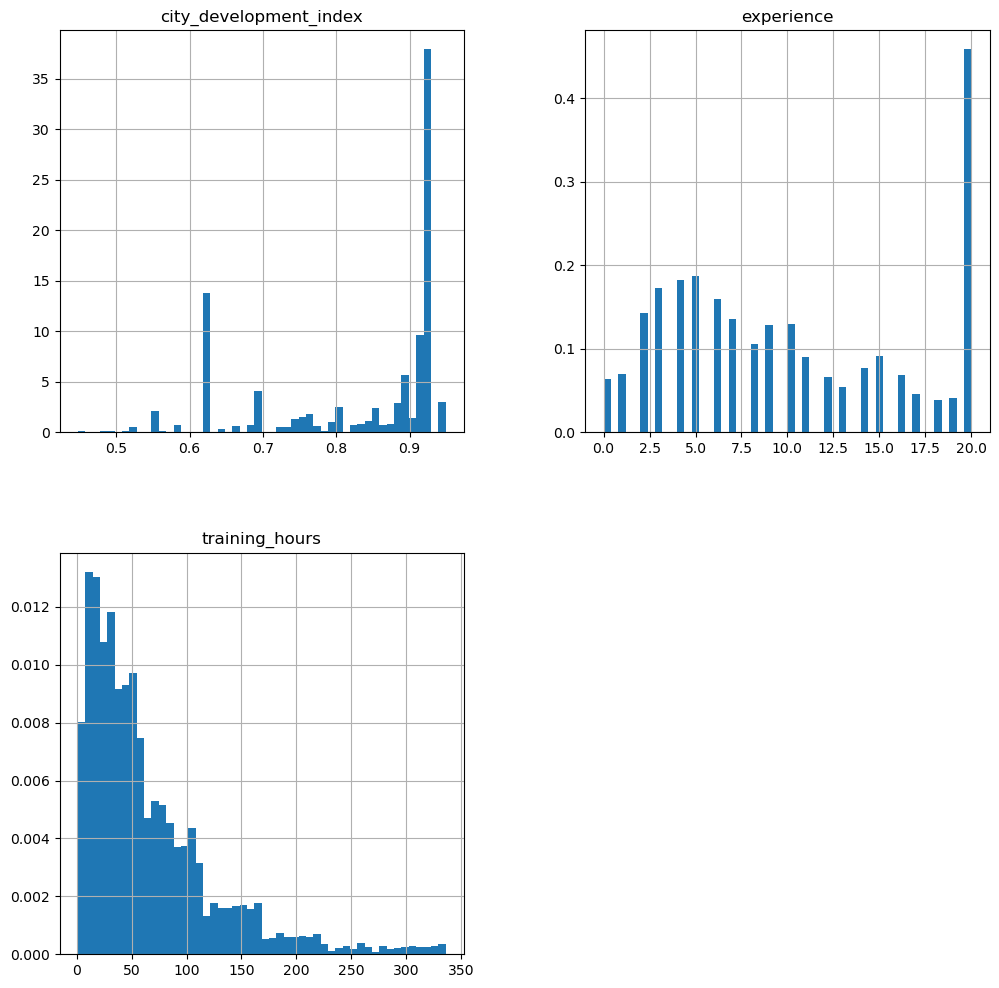

In [15]:
new_df.hist(bins=50,density=True,figsize=(12,12))
plt.show()

<Axes: >

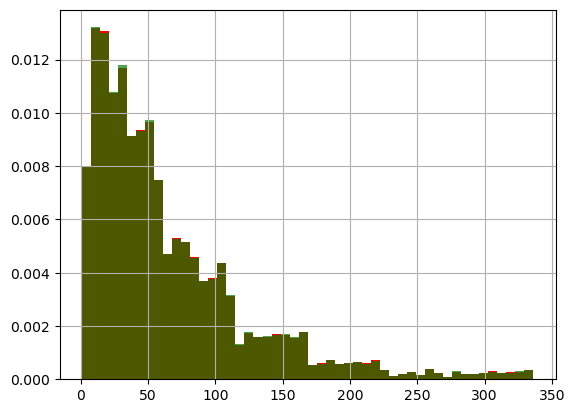

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['training_hours'].hist(bins=50,ax=ax,color='r',density=True)
new_df['training_hours'].hist(bins=50,color='g',density=True,alpha=0.7)

<Axes: ylabel='Density'>

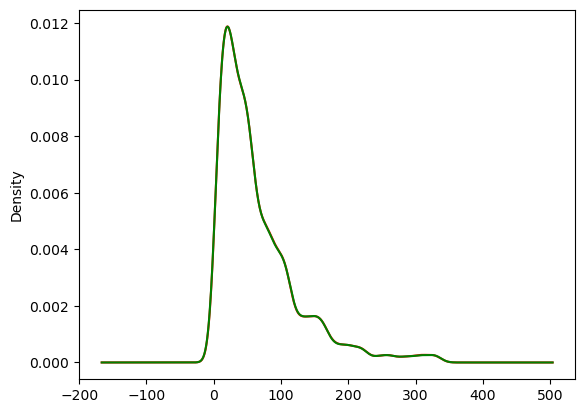

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['training_hours'].plot.density(color='red')
new_df['training_hours'].plot.density(color='g')


<Axes: >

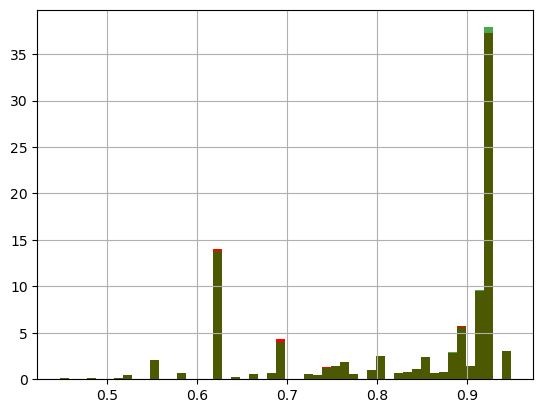

In [18]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['city_development_index'].hist(bins=50,ax=ax,color='r',density=True)
new_df['city_development_index'].hist(bins=50,color='g',density=True,alpha=0.7)

<Axes: ylabel='Density'>

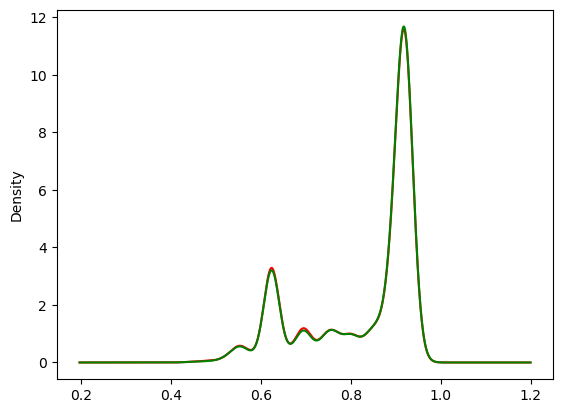

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['city_development_index'].plot.density(color='red')
new_df['city_development_index'].plot.density(color='g')


<Axes: >

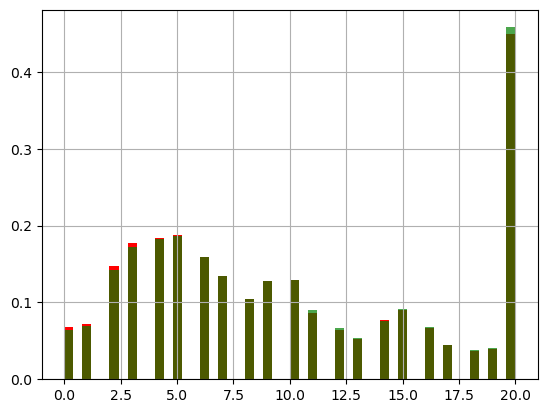

In [20]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['experience'].hist(bins=50,ax=ax,color='r',density=True)
new_df['experience'].hist(bins=50,color='g',density=True,alpha=0.7)

<Axes: ylabel='Density'>

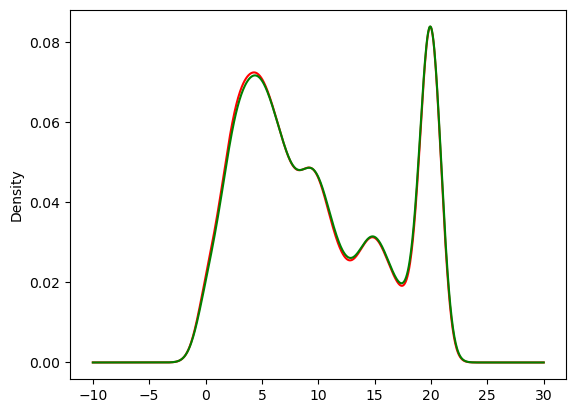

In [21]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['experience'].plot.density(color='red')
new_df['experience'].plot.density(color='g')


In [22]:
new_df['enrolled_university'].value_counts()

no_enrollment       12632
Full time course     3449
Part time course     1101
Name: enrolled_university, dtype: int64

In [23]:
new_df['education_level'].value_counts()

Graduate          10650
Masters            4022
High School        1845
Phd                 380
Primary School      285
Name: education_level, dtype: int64

In [24]:
temp=pd.concat([
                   df['enrolled_university'].value_counts() / len(df),
                new_df['enrolled_university'].value_counts() / len(new_df)] ,axis=1)
temp.columns=['oroginal','cca']
temp

,oroginal,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [25]:
temp=pd.concat([
                   df['education_level'].value_counts() / len(df),
                new_df['education_level'].value_counts() / len(new_df)] ,axis=1)
temp.columns=['oroginal','cca']
temp

,oroginal,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


# Numerical Data

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [27]:
df=pd.read_csv('titanic_toy.csv')
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [29]:
df.isnull().any()

Age          True
Fare         True
Family      False
Survived    False
dtype: bool

In [30]:
df.isnull().sum().sum()

222

In [31]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [32]:
X=df.iloc[0:,0:3]
X

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,0
888,NaN,23.4500,3
889,26.0,NaN,0


In [33]:
y=df.iloc[0:,3:]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [34]:
xtr,xte,ytr,yte=train_test_split(X,y,test_size=0.2)
xtr

,Age,Fare,Family
81,29.0,9.5000,0
45,NaN,8.0500,0
514,24.0,7.4958,0
179,36.0,0.0000,0
244,30.0,7.2250,0
...,...,...,...
373,22.0,NaN,0
652,21.0,8.4333,0
189,36.0,7.8958,0
133,29.0,NaN,1


In [35]:
xte

,Age,Fare,Family
325,36.00,135.6333,0
586,47.00,15.0000,0
122,32.50,30.0708,1
14,14.00,7.8542,0
738,NaN,7.8958,0
...,...,...,...
524,NaN,7.2292,0
724,27.00,53.1000,1
628,26.00,7.8958,0
49,18.00,17.8000,1


In [36]:
print(xtr.shape)
print(xte.shape)

(712, 3)
(179, 3)


In [37]:
xtr.isnull().mean()*100

Age       19.803371
Fare       5.477528
Family     0.000000
dtype: float64

In [38]:
mean_age=xtr['Age'].mean()
median_age=xtr['Age'].median()

In [39]:
mean_fare=xtr['Fare'].mean()
median_fare=xtr['Fare'].median()

In [40]:
xtr['Age_mean']=xtr['Age'].fillna(mean_age)
xtr['Age_median']=xtr['Age'].fillna(median_age)

In [41]:
xtr['fare_mean']=xtr['Fare'].fillna(mean_fare)
xtr['fare_median']=xtr['Fare'].fillna(median_fare)

In [42]:
xtr.sample(5)

,Age,Fare,Family,Age_mean,Age_median,fare_mean,fare_median
787,8.0,29.1250,5,8.0,8.0,29.1250,29.1250
79,30.0,12.4750,0,30.0,30.0,12.4750,12.4750
110,47.0,52.0000,0,47.0,47.0,52.0000,52.0000
494,21.0,8.0500,0,21.0,21.0,8.0500,8.0500
391,21.0,7.7958,0,21.0,21.0,7.7958,7.7958


In [43]:
xtr.cov()

,Age,Fare,Family,Age_mean,Age_median,fare_mean,fare_median
Age,214.327272,88.186518,-6.853967,214.327272,214.327272,83.002003,82.445394
Fare,88.186518,2467.391382,16.859431,70.403485,73.651474,2467.391382,2467.391382
Family,-6.853967,16.859431,2.410531,-5.494741,-5.394384,15.934652,15.955857
Age_mean,214.327272,70.403485,-5.494741,171.823551,171.823551,66.541690,66.095463
Age_median,214.327272,73.651474,-5.394384,171.823551,172.224319,69.611520,69.095993
fare_mean,83.002003,2467.391382,15.934652,66.541690,69.611520,2332.049239,2332.049239
fare_median,82.445394,2467.391382,15.955857,66.095463,69.095993,2332.049239,2348.868930


In [44]:
xtr.corr()

,Age,Fare,Family,Age_mean,Age_median,fare_mean,fare_median
Age,1.000000,0.113486,-0.307700,1.000000,1.000000,0.110600,0.109386
Fare,0.113486,1.000000,0.216243,0.107752,0.112597,1.000000,1.000000
Family,-0.307700,0.216243,1.000000,-0.269991,-0.264751,0.212529,0.212048
Age_mean,1.000000,0.107752,-0.269991,1.000000,0.998836,0.105120,0.104040
Age_median,1.000000,0.112597,-0.264751,0.998836,1.000000,0.109841,0.108637
fare_mean,0.110600,1.000000,0.212529,0.105120,0.109841,1.000000,0.996413
fare_median,0.109386,1.000000,0.212048,0.104040,0.108637,0.996413,1.000000


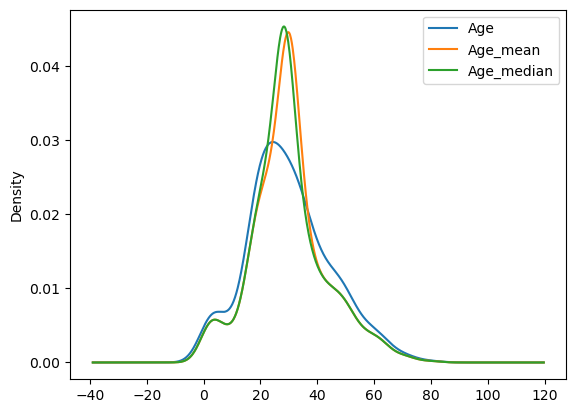

In [45]:
fig=plt.figure()
ax=fig.add_subplot(111)
xtr['Age'].plot(kind='kde')
xtr['Age_mean'].plot(kind='kde')
xtr['Age_median'].plot(kind='kde')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

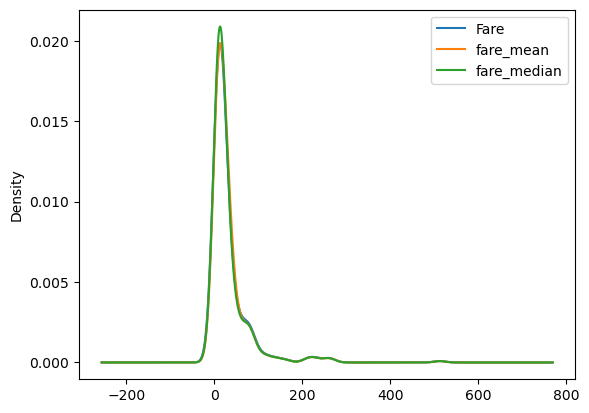

In [46]:
fig=plt.figure()
ax=fig.add_subplot(111)
xtr['Fare'].plot(kind='kde')
xtr['fare_mean'].plot(kind='kde')
xtr['fare_median'].plot(kind='kde')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

<Axes: >

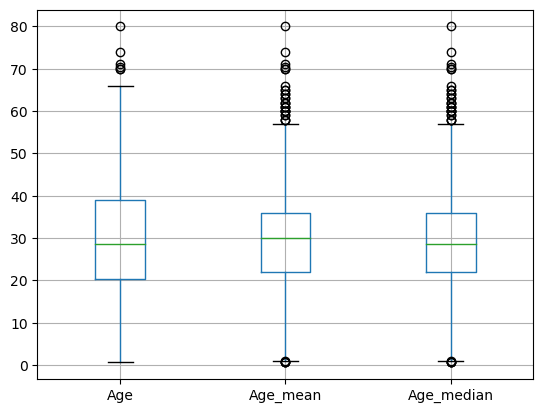

In [47]:
xtr[['Age','Age_mean','Age_median']].boxplot()

<Axes: >

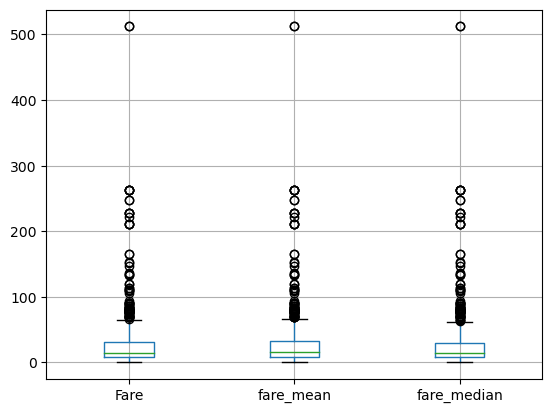

In [48]:
xtr[['Fare','fare_mean','fare_median']].boxplot()

In [49]:
xtr,xte,ytr,yte=train_test_split(X,y,test_size=0.2)


In [50]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [51]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [52]:
trf.fit(xtr)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [53]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [54]:
trf.named_transformers_['imputer2'].statistics_

array([32.35267061])

In [55]:
xtr=trf.transform(xtr)
xte=trf.transform(xte)

In [56]:
xtr

array([[23.        ,  9.225     ,  0.        ],
       [32.        , 32.35267061,  0.        ],
       [ 9.        , 34.375     ,  4.        ],
       ...,
       [60.        , 75.25      ,  1.        ],
       [34.        , 21.        ,  1.        ],
       [28.        ,  7.225     ,  0.        ]])

In [57]:
xte

array([[ 42.        ,   8.6625    ,   0.        ],
       [ 28.        ,  22.3583    ,   2.        ],
       [ 64.        , 263.        ,   5.        ],
       [  3.        ,  18.75      ,   2.        ],
       [ 28.        ,   7.8958    ,   0.        ],
       [ 44.        ,  90.        ,   2.        ],
       [ 56.        ,  83.1583    ,   1.        ],
       [ 56.        ,  26.55      ,   0.        ],
       [ 29.        ,   7.8958    ,   0.        ],
       [ 28.        ,   7.8792    ,   0.        ],
       [ 29.        ,  21.075     ,   4.        ],
       [ 12.        ,  11.2417    ,   1.        ],
       [ 24.        ,  32.35267061,   1.        ],
       [ 28.        ,   9.5       ,   0.        ],
       [ 17.        ,   7.2292    ,   2.        ],
       [ 22.        ,   7.125     ,   0.        ],
       [ 15.        ,   7.2292    ,   2.        ],
       [ 44.        ,  26.        ,   1.        ],
       [ 28.        ,  13.8625    ,   0.        ],
       [ 28.        ,   7.7333 

# Handling Categorical Data

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [120]:
df=pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [121]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [122]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

<Axes: >

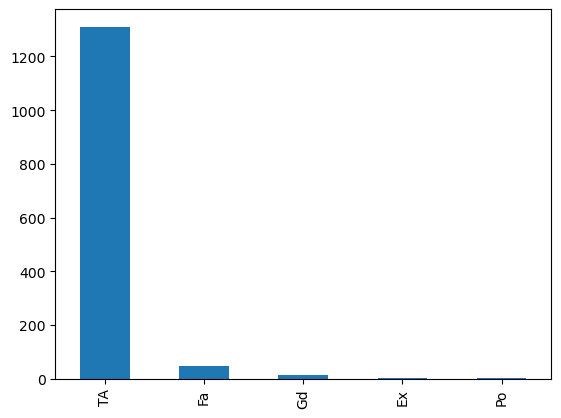

In [123]:
df['GarageQual'].value_counts().plot(kind='bar')

In [124]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

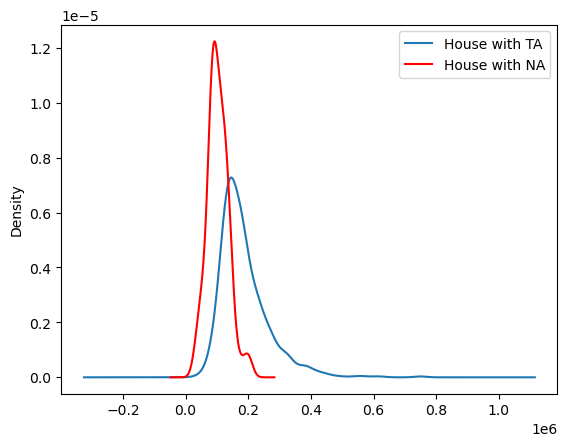

In [125]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='r')
lines,labels=ax.get_legend_handles_labels()
labels=['House with TA','House with NA']
ax.legend(lines,labels,loc='best')

In [126]:
temp=df[df['GarageQual']=='TA']['SalePrice']

In [127]:
df['GarageQual'].fillna('TA',inplace=True)

<Axes: >

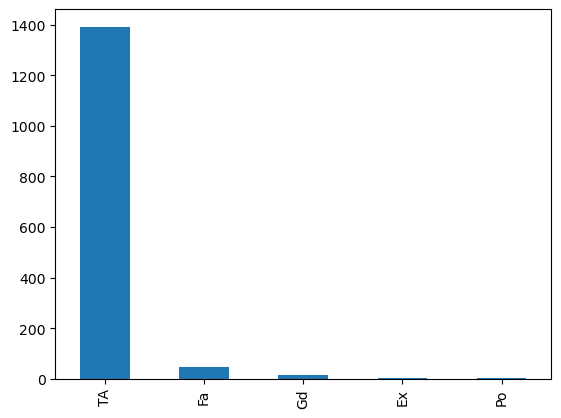

In [128]:
df['GarageQual'].value_counts().plot(kind='bar')

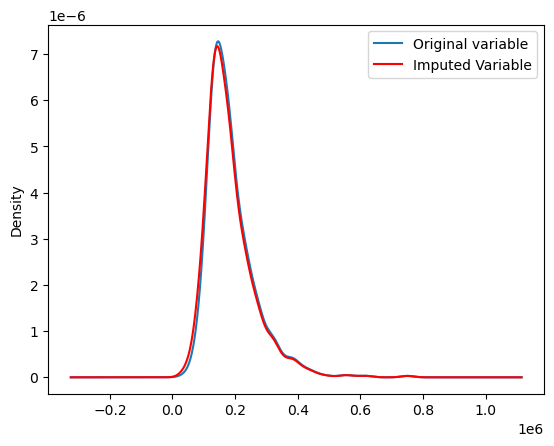

In [129]:
fig=plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde',ax=ax)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,c='red')

lines,labels=ax.get_legend_handles_labels()
labels=['Original variable','Imputed Variable']
ax.legend(lines,labels,loc='best')

<Axes: >

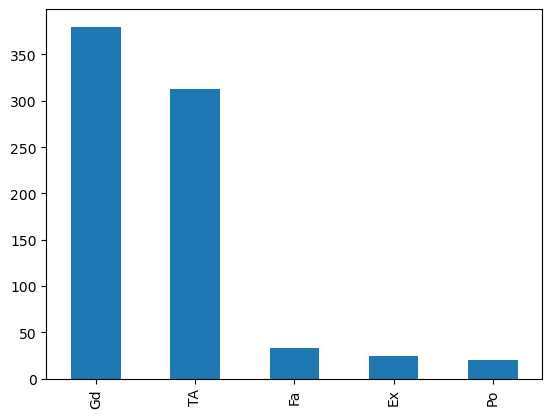

In [130]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [131]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

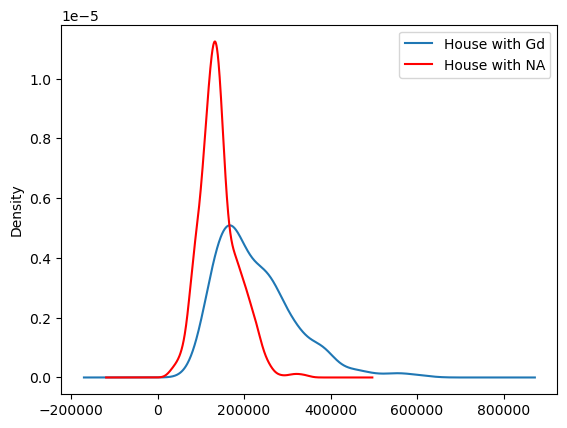

In [132]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='r')
lines,labels=ax.get_legend_handles_labels()
labels=['House with Gd','House with NA']
ax.legend(lines,labels,loc='best')

In [133]:
temp=df[df['FireplaceQu']=='Gd']['SalePrice']
temp

3       140000
6       307000
11      345000
13      279500
20      325300
         ...  
1437    394617
1440    191000
1443    121000
1451    287090
1457    266500
Name: SalePrice, Length: 380, dtype: int64

In [135]:
temp=df[df['FireplaceQu']=='Gd']['SalePrice']
temp

3       140000
6       307000
11      345000
13      279500
20      325300
         ...  
1437    394617
1440    191000
1443    121000
1451    287090
1457    266500
Name: SalePrice, Length: 380, dtype: int64

In [73]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<Axes: >

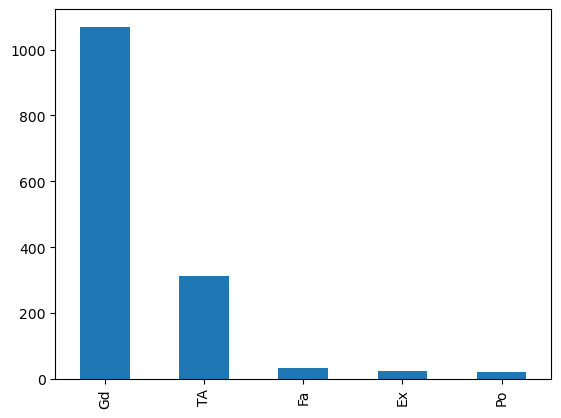

In [74]:
df['FireplaceQu'].value_counts().plot(kind='bar')

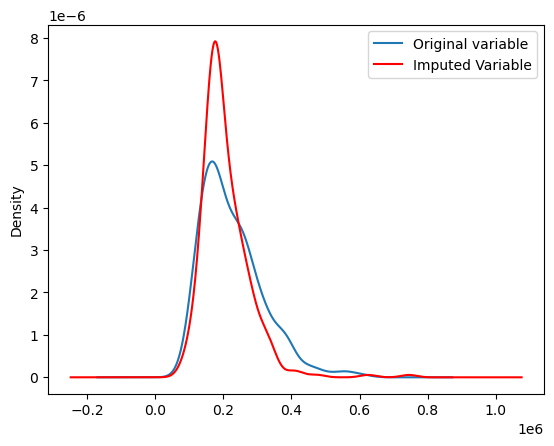

In [75]:
fig=plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde',ax=ax)
df[df['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde',ax=ax,c='red')

lines,labels=ax.get_legend_handles_labels()
labels=['Original variable','Imputed Variable']
ax.legend(lines,labels,loc='best')

In [76]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [77]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy='most_frequent')

In [78]:
xtr=imputer.fit_transform(xtr)
xte=imputer.transform(xtr)

F:\NUmpu\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [79]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

# Fill with Missing

In [80]:
df=pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [81]:
df['GarageQual'].fillna('Missing',inplace=True)

Text(0, 0.5, 'No of houses')

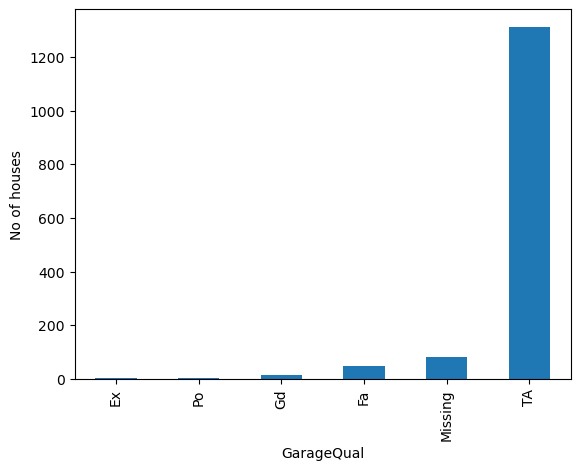

In [82]:
df['GarageQual'].value_counts().sort_values().plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('No of houses')

In [83]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy='constant',fill_value='Missing')
xtr=imputer.fit_transform(xtr)
xte=imputer.transform(xtr)
imputer.statistics_

F:\NUmpu\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array(['Missing', 'Missing'], dtype=object)

# Handling Mixed Variable

In [84]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [ ]:
one hot 
label
map
get dummies
mode


In [85]:
df=pd.read_csv('titanic.csv')
df.head(10)

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0
5,NaN,330877,2,0
6,E46,17463,2,0
7,NaN,349909,5,0
8,NaN,347742,1,1
9,NaN,237736,A,1


In [86]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

<Axes: >

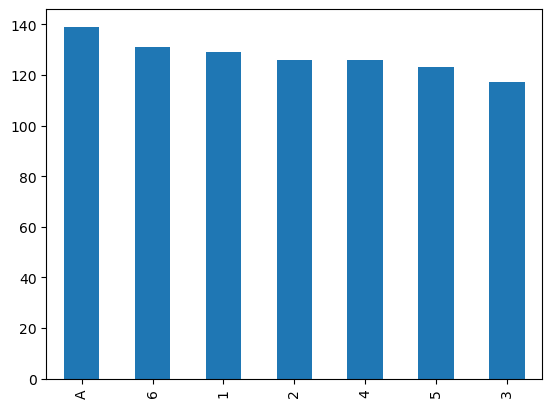

In [87]:
df['number'].value_counts().plot.bar()

In [88]:
df['number_numeric']=pd.to_numeric(df['number'],errors='coerce',downcast='integer')

In [89]:
df['number_categoric']=np.where(df['number_numeric'].isnull(),df['number'],np.nan)
df.head()

,Cabin,Ticket,number,Survived,number_numeric,number_categoric
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [90]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [91]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [92]:
df['cabin_numeric']=df['Cabin'].str.extract('(\d+)')
df['cabin_cat']=df['Cabin'].str[0]
df.head()

,Cabin,Ticket,number,Survived,number_numeric,number_categoric,cabin_numeric,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


In [93]:
df['cabin_cat'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: cabin_cat, dtype: int64

<Axes: >

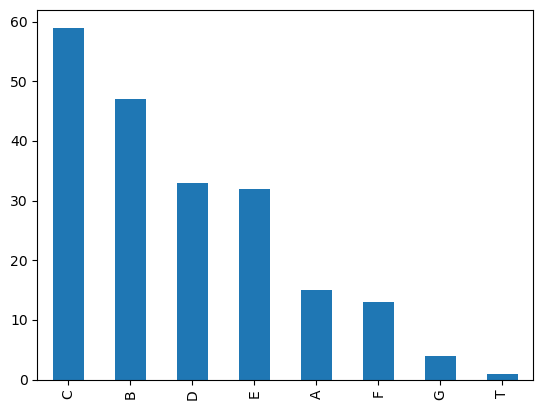

In [94]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [95]:
df['ticket_numeric']=df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_numeric']=pd.to_numeric(df['ticket_numeric'],errors='coerce',downcast='integer')
df['ticket_cat']=df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat']=np.where(df['ticket_cat'].str.isdigit(),np.nan,df['ticket_cat'])

In [96]:
df.head(20)

,Cabin,Ticket,number,Survived,number_numeric,number_categoric,cabin_numeric,cabin_cat,ticket_numeric,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,NaN,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,237736.0,NaN


In [97]:
df1=df['ticket_numeric']=df['Ticket'].apply(lambda s: s.split()[0])
df1

0           A/5
1            PC
2      STON/O2.
3        113803
4        373450
         ...   
886      211536
887      112053
888       W./C.
889      111369
890      370376
Name: Ticket, Length: 891, dtype: object

In [98]:
x=df['ticket_cat']=np.where(df['ticket_cat'].str.isdigit(),np.nan,df['ticket_cat'])
x

array(['A/5', 'PC', 'STON/O2.', nan, nan, nan, nan, nan, nan, nan, 'PP',
       nan, 'A/5.', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, 'PC', 'PC', nan, 'C.A.', 'PC', nan,
       nan, 'A./5.', nan, nan, nan, nan, nan, 'SC/Paris', nan,
       'S.C./A.4.', nan, nan, nan, nan, nan, 'A/4.', 'PC', nan, nan, nan,
       'C.A.', nan, 'C.A.', 'CA', nan, nan, nan, nan, 'PC', nan, 'C.A.',
       'S.P.', nan, nan, 'C.A.', 'CA', 'S.O.C.', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, 'SO/C', nan, 'W./C.', 'SOTON/OQ',
       nan, nan, nan, nan, 'W.E.P.', 'C.A.', nan, nan, 'PC', 'PC', nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, 'STON/O', nan, nan, 'PC', nan, 'S.O.C.', 'A4.', nan,
       nan, nan, nan, nan, 'C', nan, nan, nan, 'SOTON/O.Q.', 'A/5.', nan,
       'C.A.', 'SC/PARIS', nan, nan, nan, 'PC', nan, nan, 'STON/O2.', nan,
       nan, 'C.A.', nan, 'W./C.', nan, nan, 'S.O.P.', na

# Handling Date and Time

In [99]:
import pandas as pd
import numpy as np

In [100]:
date=pd.read_csv('orders.csv')
date

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3
...,...,...,...,...
995,2018-10-08,255,13,1
996,2018-12-06,5521,7,1
997,2019-05-07,487,26,14
998,2019-03-03,1503,21,2


In [101]:
time=pd.read_csv('messages.csv')
time

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше
...,...,...
995,2012-03-16 00:50:00,ПАРЕНЬ СДЕЛАЕТ МАССАЖ ЖЕНЩИНАМ -066-877-32-44
996,2014-01-23 23:14:00,сельский п 23 ищу девушку для отношений
997,2012-10-15 23:37:00,Д+Д ДЛЯ серьезных отношений. Мой номер 093-156...
998,2012-06-21 23:34:00,7 ДНЕПР М.34 ПОЗ.С Д/Ж ДЛЯ ВСТРЕЧ.Т.098 809 15 14


In [102]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [103]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


# Working With Date

In [104]:
date

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3
...,...,...,...,...
995,2018-10-08,255,13,1
996,2018-12-06,5521,7,1
997,2019-05-07,487,26,14
998,2019-03-03,1503,21,2


In [105]:
date['date']=pd.to_datetime(date['date'])

In [106]:
date.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [107]:
date['year']=date['date'].dt.year

In [108]:
date

,date,product_id,city_id,orders,year
0,2019-12-10,5628,25,3,2019
1,2018-08-15,3646,14,157,2018
2,2018-10-23,1859,25,1,2018
3,2019-08-17,7292,25,1,2019
4,2019-01-06,4344,25,3,2019
...,...,...,...,...,...
995,2018-10-08,255,13,1,2018
996,2018-12-06,5521,7,1,2018
997,2019-05-07,487,26,14,2019
998,2019-03-03,1503,21,2,2019


In [109]:
date['month']=date['date'].dt.month
date

,date,product_id,city_id,orders,year,month
0,2019-12-10,5628,25,3,2019,12
1,2018-08-15,3646,14,157,2018,8
2,2018-10-23,1859,25,1,2018,10
3,2019-08-17,7292,25,1,2019,8
4,2019-01-06,4344,25,3,2019,1
...,...,...,...,...,...,...
995,2018-10-08,255,13,1,2018,10
996,2018-12-06,5521,7,1,2018,12
997,2019-05-07,487,26,14,2019,5
998,2019-03-03,1503,21,2,2019,3


In [110]:
date['month_name']=date['date'].dt.month_name()
date

,date,product_id,city_id,orders,year,month,month_name
0,2019-12-10,5628,25,3,2019,12,December
1,2018-08-15,3646,14,157,2018,8,August
2,2018-10-23,1859,25,1,2018,10,October
3,2019-08-17,7292,25,1,2019,8,August
4,2019-01-06,4344,25,3,2019,1,January
...,...,...,...,...,...,...,...
995,2018-10-08,255,13,1,2018,10,October
996,2018-12-06,5521,7,1,2018,12,December
997,2019-05-07,487,26,14,2019,5,May
998,2019-03-03,1503,21,2,2019,3,March


In [111]:
date['day']=date['date'].dt.day
date

,date,product_id,city_id,orders,year,month,month_name,day
0,2019-12-10,5628,25,3,2019,12,December,10
1,2018-08-15,3646,14,157,2018,8,August,15
2,2018-10-23,1859,25,1,2018,10,October,23
3,2019-08-17,7292,25,1,2019,8,August,17
4,2019-01-06,4344,25,3,2019,1,January,6
...,...,...,...,...,...,...,...,...
995,2018-10-08,255,13,1,2018,10,October,8
996,2018-12-06,5521,7,1,2018,12,December,6
997,2019-05-07,487,26,14,2019,5,May,7
998,2019-03-03,1503,21,2,2019,3,March,3


In [112]:
date['dow']=date['date'].dt.dayofweek
date

,date,product_id,city_id,orders,year,month,month_name,day,dow
0,2019-12-10,5628,25,3,2019,12,December,10,1
1,2018-08-15,3646,14,157,2018,8,August,15,2
2,2018-10-23,1859,25,1,2018,10,October,23,1
3,2019-08-17,7292,25,1,2019,8,August,17,5
4,2019-01-06,4344,25,3,2019,1,January,6,6
...,...,...,...,...,...,...,...,...,...
995,2018-10-08,255,13,1,2018,10,October,8,0
996,2018-12-06,5521,7,1,2018,12,December,6,3
997,2019-05-07,487,26,14,2019,5,May,7,1
998,2019-03-03,1503,21,2,2019,3,March,3,6


In [113]:
date['day_name']=date['date'].dt.day_name()
date

,date,product_id,city_id,orders,year,month,month_name,day,dow,day_name
0,2019-12-10,5628,25,3,2019,12,December,10,1,Tuesday
1,2018-08-15,3646,14,157,2018,8,August,15,2,Wednesday
2,2018-10-23,1859,25,1,2018,10,October,23,1,Tuesday
3,2019-08-17,7292,25,1,2019,8,August,17,5,Saturday
4,2019-01-06,4344,25,3,2019,1,January,6,6,Sunday
...,...,...,...,...,...,...,...,...,...,...
995,2018-10-08,255,13,1,2018,10,October,8,0,Monday
996,2018-12-06,5521,7,1,2018,12,December,6,3,Thursday
997,2019-05-07,487,26,14,2019,5,May,7,1,Tuesday
998,2019-03-03,1503,21,2,2019,3,March,3,6,Sunday


In [114]:
date['date_weekend']=np.where(date['day_name'].isin(['Sunday','Saturday']),1,0)
date

,date,product_id,city_id,orders,year,month,month_name,day,dow,day_name,date_weekend
0,2019-12-10,5628,25,3,2019,12,December,10,1,Tuesday,0
1,2018-08-15,3646,14,157,2018,8,August,15,2,Wednesday,0
2,2018-10-23,1859,25,1,2018,10,October,23,1,Tuesday,0
3,2019-08-17,7292,25,1,2019,8,August,17,5,Saturday,1
4,2019-01-06,4344,25,3,2019,1,January,6,6,Sunday,1
...,...,...,...,...,...,...,...,...,...,...,...
995,2018-10-08,255,13,1,2018,10,October,8,0,Monday,0
996,2018-12-06,5521,7,1,2018,12,December,6,3,Thursday,0
997,2019-05-07,487,26,14,2019,5,May,7,1,Tuesday,0
998,2019-03-03,1503,21,2,2019,3,March,3,6,Sunday,1


In [115]:
date['week']=date['date'].dt.week
date

C:\Users\SONIC LAPTOPS\AppData\Local\Temp\ipykernel_3768\3150324583.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  date['week']=date['date'].dt.week


,date,product_id,city_id,orders,year,month,month_name,day,dow,day_name,date_weekend,week
0,2019-12-10,5628,25,3,2019,12,December,10,1,Tuesday,0,50
1,2018-08-15,3646,14,157,2018,8,August,15,2,Wednesday,0,33
2,2018-10-23,1859,25,1,2018,10,October,23,1,Tuesday,0,43
3,2019-08-17,7292,25,1,2019,8,August,17,5,Saturday,1,33
4,2019-01-06,4344,25,3,2019,1,January,6,6,Sunday,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-10-08,255,13,1,2018,10,October,8,0,Monday,0,41
996,2018-12-06,5521,7,1,2018,12,December,6,3,Thursday,0,49
997,2019-05-07,487,26,14,2019,5,May,7,1,Tuesday,0,19
998,2019-03-03,1503,21,2,2019,3,March,3,6,Sunday,1,9


In [116]:
date['quarter']=date['date'].dt.quarter
date

,date,product_id,city_id,orders,year,month,month_name,day,dow,day_name,date_weekend,week,quarter
0,2019-12-10,5628,25,3,2019,12,December,10,1,Tuesday,0,50,4
1,2018-08-15,3646,14,157,2018,8,August,15,2,Wednesday,0,33,3
2,2018-10-23,1859,25,1,2018,10,October,23,1,Tuesday,0,43,4
3,2019-08-17,7292,25,1,2019,8,August,17,5,Saturday,1,33,3
4,2019-01-06,4344,25,3,2019,1,January,6,6,Sunday,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-10-08,255,13,1,2018,10,October,8,0,Monday,0,41,4
996,2018-12-06,5521,7,1,2018,12,December,6,3,Thursday,0,49,4
997,2019-05-07,487,26,14,2019,5,May,7,1,Tuesday,0,19,2
998,2019-03-03,1503,21,2,2019,3,March,3,6,Sunday,1,9,1


In [117]:
date['semester']=np.where(date['quarter'].isin(['1','2']),1,2)
date

,date,product_id,city_id,orders,year,month,month_name,day,dow,day_name,date_weekend,week,quarter,semester
0,2019-12-10,5628,25,3,2019,12,December,10,1,Tuesday,0,50,4,2
1,2018-08-15,3646,14,157,2018,8,August,15,2,Wednesday,0,33,3,2
2,2018-10-23,1859,25,1,2018,10,October,23,1,Tuesday,0,43,4,2
3,2019-08-17,7292,25,1,2019,8,August,17,5,Saturday,1,33,3,2
4,2019-01-06,4344,25,3,2019,1,January,6,6,Sunday,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-10-08,255,13,1,2018,10,October,8,0,Monday,0,41,4,2
996,2018-12-06,5521,7,1,2018,12,December,6,3,Thursday,0,49,4,2
997,2019-05-07,487,26,14,2019,5,May,7,1,Tuesday,0,19,2,2
998,2019-03-03,1503,21,2,2019,3,March,3,6,Sunday,1,9,1,2
